In [5]:
import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import datasets

# Problem 1
Apply our double logistic regression approach to the Iris dataset. Since the model in our dataset only has 1 feature, I will run our model on the petal length feature of the dataset. Based on the histogram below, petal length seems to correlate well with class.

In [2]:
#Load the dataset
iris = datasets.load_iris()
x = iris.data[:, 2]
y = iris.target

x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y)
y_train_class_1 = np.where(y_train == 0, 1, 0)
y_train_class_2 = np.where(y_train == 1, 1, 0)
y_test_class_1 = np.where(y_test == 0, 1, 0)
y_test_class_2 = np.where(y_test == 1, 1, 0)

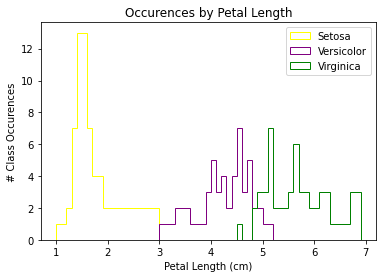

In [3]:
bins = np.unique(x)
plt.hist(x[y==0],bins,histtype='step',density=False,label='Setosa',color='yellow')
plt.hist(x[y==1],bins,histtype='step',density=False,label='Versicolor',color='purple')
plt.hist(x[y==2],bins,histtype='step',density=False,label='Virginica',color='green')
plt.legend()
plt.title('Occurences by Petal Length')
plt.xlabel('Petal Length (cm)')
plt.ylabel('# Class Occurences')
plt.show()

In [4]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def Phi(X, d=1):
    return_phi = np.ones((len(X),d+1))
    for i in range(1,d+1):
        return_phi[:,i] = np.power(X,i)
    return return_phi

def L_func(Y,phi,w,lamda=0):
    #sum term
    sum_total = 0
    for i in range(len(Y)):
        first_term = Y[i]*np.log(sigmoid(phi[i,:]@w))
        second_term = (1-Y[i])*np.log(1-sigmoid(phi[i,:]@w))
        third_term = lamda * np.transpose(w)@w
        sum_total += first_term + second_term - third_term 
    return sum_total

def L_grad_func(Y, w, phi, lamda=0):
    m = len(Y)
    return_sum = 0
    for i in range(m):
        return_sum += (Y[i] - sigmoid(phi[i,:]@w))*phi[i,:]
    return -return_sum+lamda*np.transpose(w)

def gradient_descent(Y, grad, L, phi, guess, eta=1e-3, tol=1e-6, pbar=None):
    """
    grad - gradient function
    w0 - initial guess (nx1 vector)
    eta - step size
    tol - convergence tolerance
    """
    current_tol = 100
    w_curr = guess
    iters = 0
    while current_tol > tol:
        w_new = w_curr - eta * grad(Y, w_curr, phi)
        current_tol = np.sqrt((w_new[0]-w_curr[0])**2 + (w_new[1]-w_curr[1])**2)
        w_curr = w_new
        iters += 1
        if pbar is not None:
            pbar.update(1)
            if iters % 800 == 0:
                pbar.set_description_str(f'Current tol: {current_tol}')
    return w_curr[0], w_curr[1]

In [11]:
phi_train = Phi(x_train)
w1 = np.random.random((2))
w2 = np.random.random((2))

tol_log1 = tqdm.tqdm(position=0)
tol_log2 = tqdm.tqdm(position=0)

# Apply gradient descent to find optimal weights for class logistic regressions 1 and 2
w1 = gradient_descent(y_train_class_1, L_grad_func, L_func, phi_train, w1, 1e-3, 1e-5, tol_log1)
w2 = gradient_descent(y_train_class_2, L_grad_func, L_func, phi_train, w2, 1e-3, 1e-5, tol_log2)

Current tol: 0.00010111902633843459: 29355it [01:09, 422.13it/s]
Current tol: 0.00021497271860350205: 1230it [01:09, 17.69it/s] 
Current tol: 2.432230616029664e-06: 1611218it [1:39:37, 269.52it/s]
Current tol: 3.4852576934840984e-05: 1825it [07:56, 478.13it/s]s]

In [12]:
print(w1, w2)

(20.86151857836392, -8.398638663093342) (-1.7955099244472579, 0.3054762337250111)


In [13]:
phi_test = Phi(x_test)

In [14]:
successes = 0
for i in range(x_test.size):
    class_1_pred = sigmoid(w1[1] * x_test[i] + w1[0])
    class_2_pred = sigmoid(w2[1] * x_test[i] + w2[0])
    class_3_pred = 1 - class_1_pred - class_2_pred
    guesses = np.array([class_1_pred, class_2_pred, class_3_pred])
    class_prediction = np.argmax(guesses)
    if class_prediction == y_test[i]:
        successes += 1
print(f'Got {(successes / x_test.size)*100:.2f}% Correct')

Got 52.63% Correct


Current tol: 1.0002329614402784e-05: 355089it [08:13, 815.01it/s]

Not great, but it's better than guessing among the three class randomly. My best estimate was around 60% correct. Adding more features would likely improve this estimate.

# Problem 2: Backpropagation

### Part A: Compute $\frac{\partial L}{\partial w^{(2)}_2}$ Analytically

In [42]:
# Define model feature, output, and parameters
x = 1.
y = 0.5
w_1_1 = 0.5
w_2_1 = 0.7
w_2_2 = -0.3
w_3_1 = 0.1
w_3_2 = -0.8

def sigmoid(n):
    return 1 / (1 + np.exp(-n))
def sigmoid_prime(n):
    return np.exp(n)/np.square(np.exp(n)+1)

In [43]:
# Compute hidden values
a_1 = x * w_1_1
z_1 = sigmoid(a_1)
a_2_1 = z_1 * w_2_1
a_2_2 = z_1 * w_2_2
z_2_1 = sigmoid(a_2_1)
z_2_2 = sigmoid(a_2_2)
a_3 = z_2_1 * w_3_1 + z_2_2 * w_3_2
z_3 = a_3
L = 0.5 * (z_3 - y)**2

In [44]:
# Compute dL/dw^2_2]
derivative = (z_3 - y) * w_3_2 * sigmoid_prime(a_2_2) * z_1
print(derivative)

0.09898163577188604


### Part B: Compute $\frac{\partial L}{\partial w^{(2)}_2}$ Numerically

In [48]:
from scipy import optimize

def L_func(w, x, y):
    a_1 = x * w[0]
    z_1 = sigmoid(a_1)
    a_2_1 = z_1 * w[1]
    a_2_2 = z_1 * w[2]
    z_2_1 = sigmoid(a_2_1)
    z_2_2 = sigmoid(a_2_2)
    a_3 = z_2_1 * w[3] + z_2_2 * w[4]
    z_3 = a_3
    return 0.5 * (z_3 - y)**2

In [64]:
w_vec = np.array([w_1_1, w_2_1, w_2_2, w_3_1, w_3_2])
result = optimize.approx_fprime(w_vec, L_func, 1e-12, x, y)

In [65]:
print(f'Derivative of L w.r.t w_1_1: {result[0]:.6f}')
print(f'Derivative of L w.r.t w_2_1: {result[1]:.6f}')
print(f'Derivative of L w.r.t w_2_2: {result[2]:.6f}')
print(f'Derivative of L w.r.t w_3_1: {result[3]:.6f}')
print(f'Derivative of L w.r.t w_3_2: {result[4]:.6f}')

Derivative of L w.r.t w_1_1: -0.014267
Derivative of L w.r.t w_2_1: -0.011935
Derivative of L w.r.t w_2_2: 0.098979
Derivative of L w.r.t w_3_1: -0.487108
Derivative of L w.r.t w_3_2: -0.363662
